In [1]:
import numpy as np
import pandas as pd

np.random.seed(7)
n = 400

df = pd.DataFrame({
    "Survived": np.random.choice([0, 1], size=n, p=[0.62, 0.38]),
    "Pclass": np.random.choice([1, 2, 3], size=n, p=[0.2, 0.2, 0.6]),
    "Age": np.clip(np.random.normal(29, 14, size=n), 0, 80),
    "Fare": np.concatenate([
        np.random.gamma(shape=2.0, scale=15.0, size=n-5),
        [150, 200, 250, 300, 500]
    ])
})

print(df.shape)
print(df.head())


(400, 4)
   Survived  Pclass        Age       Fare
0         0       3  40.244887  33.961745
1         1       3   9.609901  17.741772
2         0       2  36.825221  18.483655
3         1       2  38.394015  28.266200
4         1       3  18.475928  76.720030


### 대표값 퍼짐 분위수 요약

In [2]:
df.describe()

,Survived,Pclass,Age,Fare
count,400.000000,400.000000,400.000000,400.000000
mean,0.382500,2.380000,29.072274,33.235843
std,0.486606,0.798244,13.043632,38.132786
min,0.000000,1.000000,0.000000,1.481436
25%,0.000000,2.000000,19.963868,14.863357
50%,0.000000,3.000000,28.759929,25.932312
75%,1.000000,3.000000,38.598555,40.112388
max,1.000000,3.000000,65.325036,500.000000


Axes(0.125,0.11;0.775x0.77)


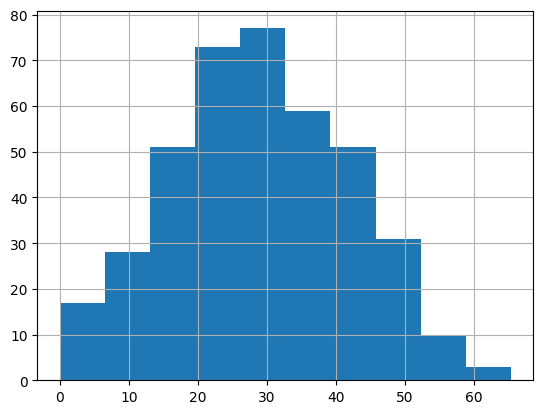

In [3]:
# 위 표를 보고 Age와 Fare는 분포가 퍼저있음을 확인 할 수 있다.

print(df['Age'].hist())

Axes(0.125,0.11;0.775x0.77)


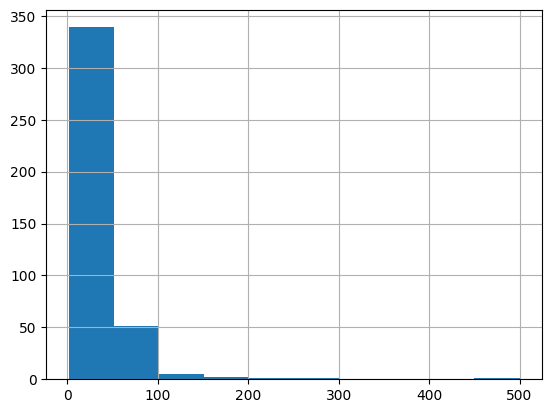

In [4]:
print(df['Fare'].hist())

In [5]:
# 왜곡의 정도를 수치화 하기 위해서 skew()함수를 사용한다.

print(f'평균: {df['Fare'].mean()}\n중앙값:{df['Fare'].median()}\n') # 평균 > 중앙값 => 오른꼬리
print(f'왜곡률 : {df['Fare'].skew()}') # 0일수록 정규분포 

평균: 33.23584250593798
중앙값:25.932311544374418

왜곡률 : 6.545299399757991


In [6]:
df['Fare'].quantile([0.5,0.75,0.9,0.99,1.0])

0.50     25.932312
0.75     40.112388
0.90     60.132821
0.99    190.190480
1.00    500.000000
Name: Fare, dtype: float64

### 이상값에 대한 Flag 생성 
- 그룹간 비교를 하기도한다
- 체크용 (책갈피 느낌)

In [7]:
fare_over95 = df['Fare'].quantile(0.95)

print(f'사분위 95 범위 수치 :{fare_over95}')
df['95%_flag'] = np.where(df['Fare'] > fare_over95,'Flag','')
df


사분위 95 범위 수치 :76.14071284631808


,Survived,Pclass,Age,Fare,95%_flag
0,0,3,40.244887,33.961745,
1,1,3,9.609901,17.741772,
2,0,2,36.825221,18.483655,
3,1,2,38.394015,28.266200,
4,1,3,18.475928,76.720030,Flag
...,...,...,...,...,...
395,1,3,1.568905,150.000000,Flag
396,0,3,47.252896,200.000000,Flag
397,0,3,41.319141,250.000000,Flag
398,0,3,13.841681,300.000000,Flag


In [8]:
# Flag를 이용한 그룹비교 
df.groupby('95%_flag')['Fare'].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
95%_flag,,,,,
,380,27.366028,24.006471,1.481436,76.110222
Flag,20,144.762313,100.083533,76.720030,500.000000


# 연습 샘플코드 1 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------
# 1) 샘플 데이터 만들기
# -----------------------
def make_sample(n=400, seed=7):
    np.random.seed(seed)

    df = pd.DataFrame({
        "Survived": np.random.choice([0, 1], size=n, p=[0.62, 0.38]),
        "Pclass": np.random.choice([1, 2, 3], size=n, p=[0.2, 0.2, 0.6]),
        "Age": np.clip(np.random.normal(29, 14, size=n), 0, 80),
        "Fare": np.concatenate([
            np.random.gamma(shape=2.0, scale=15.0, size=n-5),
            [150, 200, 250, 300, 500]
        ])
    })

    return df

df = make_sample()
df.head()


,Survived,Pclass,Age,Fare
0,0,3,40.244887,33.961745
1,1,3,9.609901,17.741772
2,0,2,36.825221,18.483655
3,1,2,38.394015,28.266200
4,1,3,18.475928,76.720030


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  400 non-null    int64  
 1   Pclass    400 non-null    int64  
 2   Age       400 non-null    float64
 3   Fare      400 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [11]:
df.describe()

,Survived,Pclass,Age,Fare
count,400.000000,400.000000,400.000000,400.000000
mean,0.382500,2.380000,29.072274,33.235843
std,0.486606,0.798244,13.043632,38.132786
min,0.000000,1.000000,0.000000,1.481436
25%,0.000000,2.000000,19.963868,14.863357
50%,0.000000,3.000000,28.759929,25.932312
75%,1.000000,3.000000,38.598555,40.112388
max,1.000000,3.000000,65.325036,500.000000


<Axes: >

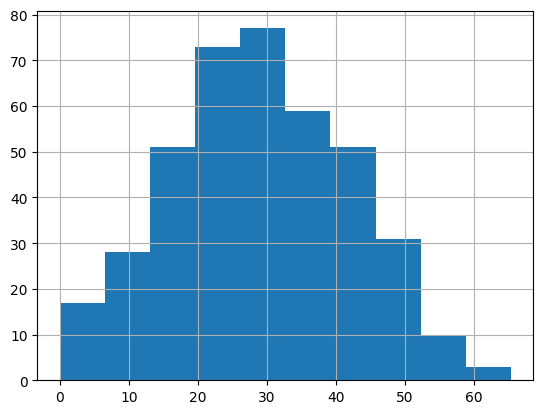

In [12]:
df['Age'].hist()

<Axes: >

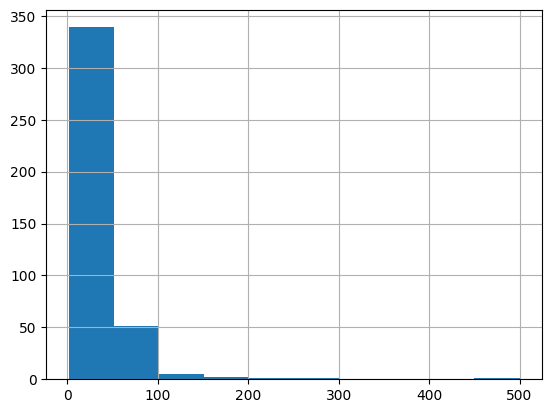

In [13]:
df['Fare'].hist()

In [14]:
print(f'%별 데이터 값 경계:\n{df['Fare'].quantile([0.75,0.95,0.99,1])}')

# 경계에 따른 그룹만들기
df['high_price'] = df['Fare'] > df['Fare'].quantile(0.95)
df

%별 데이터 값 경계:
0.75     40.112388
0.95     76.140713
0.99    190.190480
1.00    500.000000
Name: Fare, dtype: float64


,Survived,Pclass,Age,Fare,high_price
0,0,3,40.244887,33.961745,False
1,1,3,9.609901,17.741772,False
2,0,2,36.825221,18.483655,False
3,1,2,38.394015,28.266200,False
4,1,3,18.475928,76.720030,True
...,...,...,...,...,...
395,1,3,1.568905,150.000000,True
396,0,3,47.252896,200.000000,True
397,0,3,41.319141,250.000000,True
398,0,3,13.841681,300.000000,True


### 만든 그룹과의 상관관계
- Fare가 높을수록 생존, 좌석과 상관있는지? 

In [15]:
# ⭐️ 상위 그룹과의 비교를 통한것.
df.groupby('high_price',as_index=False).agg({'Survived':['mean','count'],'Pclass':['mean','count']})

high_price  Survived          Pclass      
                  mean count      mean count
0      False  0.378947   380  2.363158   380
1       True  0.450000    20  2.700000    20

In [16]:
# 좌석에 따른 생존률
df.groupby('Pclass',as_index=False)['Survived'].agg('mean','count')

,Pclass,Survived
0,1,0.362500
1,2,0.363636
2,3,0.396552


In [17]:
# 상위 그릅과 좌석 별을 동시에 -> 🐚 이게 비싼좌석이라 사는건지 그렇다면 비싼상위들은 많이 살아남았는지 보기 위함인거임.

df.groupby(['high_price','Pclass'],as_index=False)['Survived'].agg('mean','count')

,high_price,Pclass,Survived
0,False,1,0.367089
1,False,2,0.357143
2,False,3,0.391705
3,True,1,0.000000
4,True,2,0.500000
5,True,3,0.466667


# 연습 샘플코드 2

In [18]:
import numpy as np
import pandas as pd

# -----------------------
# 1) 샘플 데이터 만들기 (Titanic 느낌)
# -----------------------
def make_titanic_like(n=600, seed=10):
    np.random.seed(seed)

    df = pd.DataFrame({
        "Pclass": np.random.choice([1, 2, 3], size=n, p=[0.22, 0.20, 0.58]),
        "Sex": np.random.choice(["male", "female"], size=n, p=[0.65, 0.35]),
        "Age": np.clip(np.random.normal(29, 14, size=n), 0, 80),
    })

    # Fare: 등급이 높을수록 비싸게 + 꼬리 조금 추가
    base = np.random.gamma(shape=2.0, scale=12.0, size=n)
    class_multiplier = df["Pclass"].map({1: 3.0, 2: 1.8, 3: 1.0}).astype(float).values
    df["Fare"] = base * class_multiplier

    # 꼬리값(outlier) 추가
    idx = np.random.choice(df.index, size=max(5, n // 120), replace=False)
    df.loc[idx, "Fare"] = df.loc[idx, "Fare"] + np.random.choice([150, 220, 350, 500], size=len(idx))

    # Survived 생성(완전 랜덤X): 여성/어린이/상위등급/요금이 조금 유리하도록 확률 설정
    p = (
        0.15
        + 0.18 * (df["Sex"] == "female").astype(float)
        + 0.10 * (df["Age"] < 12).astype(float)
        + 0.10 * (df["Pclass"] == 1).astype(float)
        + 0.04 * (df["Fare"] > df["Fare"].quantile(0.95)).astype(float)
    )
    p = np.clip(p, 0.02, 0.95)
    df["Survived"] = (np.random.rand(n) < p).astype(int)

    return df

df = make_titanic_like()
df.head()


,Pclass,Sex,Age,Fare,Survived
0,3,male,18.207582,41.510069,1
1,1,female,34.197932,71.616818,0
2,3,female,39.800576,6.488689,0
3,3,male,5.639143,20.041374,1
4,3,female,11.161642,18.702706,0


### 가설 1: "비싼 그룹이 더 살아남나?"


In [19]:
df['Fare'].describe()

count    600.000000
mean      40.183364
std       46.363724
min        0.957864
25%       14.277567
50%       26.433169
75%       51.565304
max      522.419337
Name: Fare, dtype: float64

In [20]:
print(f' 비율:\n{df['Fare'].quantile([0.9,0.95,0.99,1])}')

# 0.99부터 확 비싸졌다고 판단하여 하였지만 수가 너무 적어서 애매. 따라서 상위 10%인 0.9로 진행하였는데 생존 확률이 0.1이상 높다. 
df['high_price'] = df['Fare'] > df['Fare'].quantile(0.90)
print()
print(df.groupby('high_price',as_index=False)['Survived'].agg(['mean','count']))

# 하지만 비싼 그룹이 살아남은건지 아니면 그냥 인지는 모름. 따라서 다른 부분도 비교해봐야한다. 
print()
print(df.groupby('Pclass',as_index=False)['Survived'].agg(['mean','count']))

# ⭐️ --> 돈이 많다 -> 좋은자리에 앉는다 -> 생존 확률이 높다 라는 가설은 이로써 틀렸음을 증명할수있다.

 비율:
0.90     91.984907
0.95    115.883012
0.99    203.699395
1.00    522.419337
Name: Fare, dtype: float64

   high_price      mean  count
0       False  0.231481    540
1        True  0.366667     60

   Pclass      mean  count
0       1  0.344828    145
1       2  0.222222    117
2       3  0.210059    338


### 가설 2: "비싼 그룹에서도 성별 차이가 있나?"


In [21]:
print(df.groupby('high_price',as_index=False)['Sex'].value_counts())
print()

   high_price     Sex  count
0       False    male    335
1       False  female    205
2        True    male     37
3        True  female     23



### 가설 3: "비싼 그룹에서도 아이/성인 차이가 있나?"


In [22]:
df['child'] = df['Age'] < 8

df.groupby(['high_price','child'],as_index=False)['Survived'].mean()
# 비싼 그룹이라 해서 성인이고 미성년자고 그냥 생존 확률이 비슷함; 8살까지는 아이가 더 생존이 높은데 이후에는 좀 비슷해짐. 

,high_price,child,Survived
0,False,False,0.227451
1,False,True,0.300000
2,True,False,0.357143
3,True,True,0.500000


### 가설 4: "여자와 아이일수록 생존 확률이 높았을까?"

In [23]:
print(df.groupby(['high_price','Sex'],as_index=False)['Survived'].mean()) # 비싸고 여자일수록 더 살아남긴함 근데 이게 미싼 곳의 여자라 그럴까 여자라 그럴까?

#검증
print(df.groupby('Sex',as_index=False)['Survived'].mean()) # 전반적으로 여자가 더 남자보다 살아남긴했다. 단 비싼 여자가 압도적으로 더 살았을뿐.


   high_price     Sex  Survived
0       False  female  0.375610
1       False    male  0.143284
2        True  female  0.521739
3        True    male  0.270270
      Sex  Survived
0  female  0.390351
1    male  0.155914


In [24]:
print(df.groupby(['child','Sex'],as_index=False)['Survived'].mean()) # 미성년자와 여자들의 생존은 다른거에 비해 더했을까?

# 검정 -> 나이와는 무관하게 그냥 여자가 훨씬 더살았음. 미성년자 여자는 남자보다 훨씬 더 살았고. 성인 남자와 미성년자 남자의 생존차이는 비슷함.

   child     Sex  Survived
0  False  female  0.382488
1  False    male  0.151862
2   True  female  0.545455
3   True    male  0.217391
